# The Role of Economic Factors in Political Shifts #
    
### by Peter Meijer ###


#### Contents ####
1. Background
2. Data Sources
3. Libraries and API
4. Economic Analysis & Visualization
5. Political Analysis & Visualization
6. The Role of Economic Factors in Political Shifts
7. Conclusion

### 1. Background ###

During the 1992 elections, political stragist James Carville noted one of the pivotal reasons why he believed his candidate, former Arkansas governor Bill Clinton, had a chance at beating then President Bush: ** "The economy, stupid!" **

Carville noted that President Bush had become deeply unpopular thanks to the ongoing recession and his recent raising of taxes despite an earlier pledge not to, and he was defeated by Clinton in the election. The 1992 presidential election affirmed the political axion that "people vote with their pocketbooks," implying that voters will reward political parties who preside over stronger economic conditions and penalize parties that govern under weaker economic conditions.

The intent of this project is to analyze economic and political trends from 1948 to the present in order to explore the relationship between economic performance and political shifts in the United States.

In [1]:
import sys                             
import pandas as pd     
import pandas_datareader.data as web
import matplotlib.pyplot as plt 
import datetime as dt                
import seaborn as sns
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

%matplotlib inline                     

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Today: ', dt.date.today())

Python version: 3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.19.2
Today:  2017-05-12


### 2. Data Sources ###

#### 2|1 Economic Data Source ####

For the economic data, I have used the authoritative databases of the Federal Reserve Bank of St. Louis' *FRED* dataset. In particular, I am interested in the unemployment rate in the year before a presidential election relative to the average unemployment rate in the previous three years. The *FRED* dataset [is available here](https://fred.stlouisfed.org/series/PAYEMS) but can also be accessed through the DataReader panda I imported above.

#### 2|2 Political Data Source ####

For the political data, I found a recently-published report from the think-tank Brookings Institute titled *Vital Statistics on Congress* which was published on January 9th, 2017. The Brookings report [can be viewed here](https://www.brookings.edu/multi-chapter-report/vital-statistics-on-congress/). The report features dozens of individual datasources, and I have chosen to use *Data Table 1-20 Political Parties of Senators and Representatives, 34th - 114th Congresses, 1855-2015*, a PDF of which [can be viewed here](https://www.brookings.edu/wp-content/uploads/2017/01/vitalstats_ch1_tbl20.pdf).

### 3. Slicing and Cleaning Datasets ###

As noted above, the economic dataset is readily available through the DataReader panda. The political data is available through Brookings as either a PDF, Excel, or CSV file. In the below cell I retrieve the CSV file and assign it to my DataFrame. 

In [2]:
URL1 = 'https://www.brookings.edu/wp-content/uploads/'
URL2 = '2017/01/vitalstats_ch1_tbl20.csv' 
poldata = pd.read_csv(URL1 + URL2)

In [3]:
df = pd.DataFrame(poldata, index = ['Congress'])

This DataFrame is a good start, but I need to clean it up to not only narrow the date range to our 1950-2015 period, but to also eliminate third parties (Column 4's 'Other') and 'Vacant' seats, and finally to create a more convenient layout for analysis.

First, let's drop all of the results in the 'PartyStatus' column that aren't Republican or Democrat.

In [4]:
poldata = poldata[np.asarray(poldata.PartyStatus == 'Republican')  | np.asarray(poldata.PartyStatus == 'Democrat')]

Next, let's remove the earlier historical data from before our survey (before the 81st Congress took office in 1949). 

In [5]:
poldata = poldata[np.asarray(poldata.Congress >= 81)] 

Before we proceed, I want to check the types of the values in my DataFrame to be sure my later operations will be successful.

In [6]:
poldata.dtypes

Congress        int64
Years          object
Chamber        object
PartyStatus    object
Seats          object
dtype: object

If we look at what is left, we have all the data in one large DataFrame. For the ease of plotting, we will split these up into four groups later (House Democrats, House Republicans, Senate Democrats, and Senate Republicans).

The other bit of cleaning we have to do is to convert the index 'Congress' from the Congressional number (which began with the 1st Congress in 1787) to the AD year date in order to compare economic and political data. To do this I will create a yearconverter program and apply it to the 'Congress' column of my dataframe to modify the column 'Years' to not reflect a date range (as it was originally) but to have one year.

In [7]:
yearconverter = lambda x: x*2 + 1787
poldata['Years'] = poldata['Congress'].apply(yearconverter)

In [8]:
poldata.dtypes

Congress        int64
Years           int64
Chamber        object
PartyStatus    object
Seats          object
dtype: object

Next, we can further slice the DataFrame into both chambers, Senate and House.

In [9]:
senate = poldata[np.asarray(poldata.Chamber == 'Senate')] 

In [10]:
house = poldata[np.asarray(poldata.Chamber == 'House')] 

Lastly, we will further slice each DataFrame to return only the results for Republicans and Democrats - eliminating 'Vacant' and 'All' - so we are left with four DataFrames, two for each house and two for each party.

In [11]:
senatedem = senate[np.asarray(senate.PartyStatus == 'Democrat')] 
senategop = senate[np.asarray(senate.PartyStatus == 'Republican')] 

In [12]:
housedem = house[np.asarray(house.PartyStatus == 'Democrat')] 
housegop = house[np.asarray(house.PartyStatus == 'Republican')] 

I have also concatenated both houses' results into one stack for potential ease of graphing later.

In [13]:
senatevertstack = pd.concat([senatedem, senategop], axis=0)

In [14]:
housevertstack = pd.concat([housedem, housegop], axis=0)

### 4. Economic Analysis & Visualization ###

#### 4|1 Unemployment ####

First, let's examine the overall unemployment trends from 1950 to 2016. To do this, we take the FRED database panda, set the dates (1950-2016), and adjust the aspect ratio, titles, and other stylistic components.

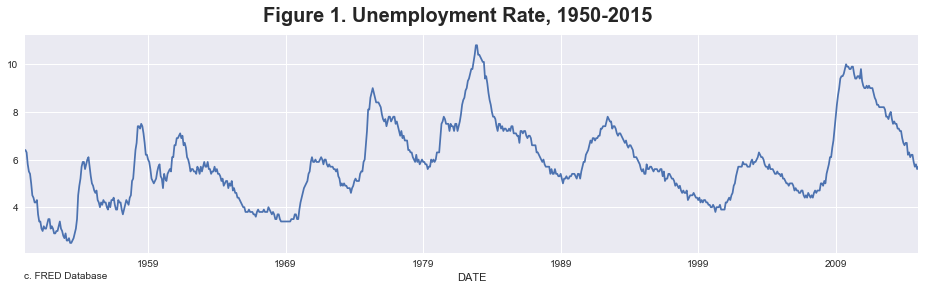

In [15]:
start, end = dt.datetime(1950, 2, 1), dt.datetime(2015, 1, 1)
data = web.DataReader(['UNRATE'],'fred', start, end)
data.columns = ['Unemployment Rate'] 
plt.figure(figsize=plt.figaspect(0.25))

data['Unemployment Rate'].plot()
plt.text(dt.datetime(1950, 1, 1), 1, 'c. FRED Database', fontsize=10, weight='regular')
plt.suptitle('Figure 1. Unemployment Rate, 1950-2015', fontsize=20, weight='bold')
plt.show()


As we see from this chart, the US unemployment rate has fluctuated from a low of roughly 2% in the mid-1950s to a high of over 10% during the early 1980s, with great variability in these numbers throughout.

#### 4|2 Recessions ####
Next, we can use the same FRED database to examine the relationship between unemployment rates and recessions, which are defined by the National Bureau of Economic Research (NBER) as a "significant decline in economic activity spreading across the economy, lasting more than a few months." The below code takes the graph of unemployment rates above and highlights the months where the NBER determiend the US was in a recession.

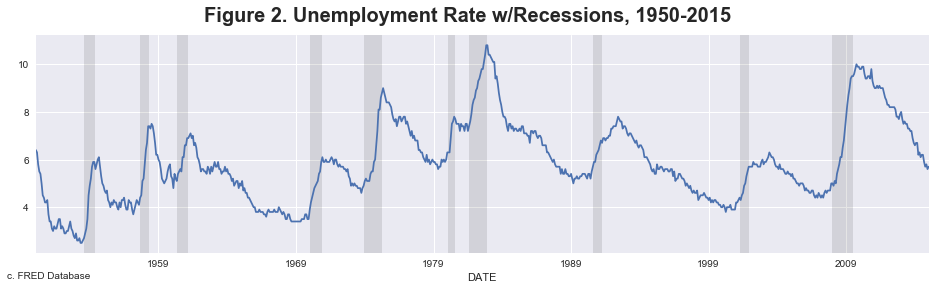

In [16]:
start, end = dt.datetime(1950, 2, 1), dt.datetime(2015, 1, 1)
data = web.DataReader(['UNRATE', 'USREC'],'fred', start, end)
data.columns = ['Unemployment Rate', 'Recession'] 
plt.figure(figsize=plt.figaspect(0.25))
data['Unemployment Rate'].plot()
plt.text(dt.datetime(1948, 1, 1), 1, 'c. FRED Database', fontsize=10, weight='regular')
plt.suptitle('Figure 2. Unemployment Rate w/Recessions, 1950-2015', fontsize=20, weight='bold')

def recession_months():
    rec_dates = data['Recession']
    one_vals = np.where(rec_dates == 1) 
    rec_startind = rec_dates.index[one_vals]
    return rec_startind

def hl_recession(dates):
    for date in dates:
        plt.axvspan(date, date+relativedelta(months=+1), color='k', alpha=.1, lw=0)
    
hl_recession(recession_months())

### 5. Political Analysis & Visualization ###

Now, we will take the political datasets we cleaned up and spliced above and visualize them to better see the trends. The political datasets do not have a strict year because Congress serves on a two-year term, but the year 1950 occurred during the 81st Congress and the 115th came into office by 2015.  

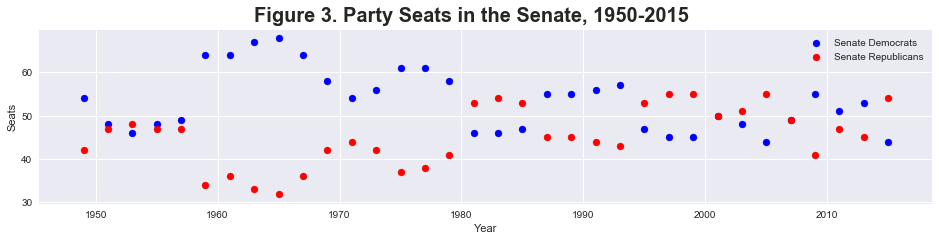

In [17]:
plt.figure(figsize=plt.figaspect(.2))
p1 = plt.scatter(senatedem['Years'], senatedem['Seats'], color = 'blue')
p2 = plt.scatter(senategop['Years'], senategop['Seats'], color = 'red')
plt.legend((p1,p2),('Senate Democrats', 'Senate Republicans'),numpoints=1, loc='best')
plt.xlabel('Year')
plt.ylabel('Seats')
plt.suptitle('Figure 3. Party Seats in the Senate, 1950-2015', fontsize=20, weight='bold')
plt.show()

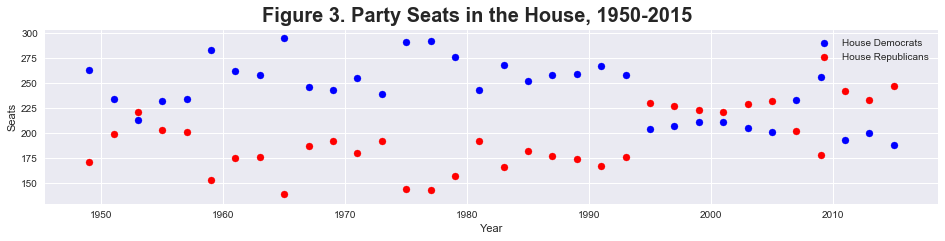

In [18]:
plt.figure(figsize=plt.figaspect(.2))
p3 = plt.scatter(housedem['Years'], housedem['Seats'], color = 'blue')
p4 = plt.scatter(housegop['Years'], housegop['Seats'], color = 'red')
plt.legend((p3,p4),('House Democrats', 'House Republicans'),numpoints=1, loc='best')
plt.xlabel('Year')
plt.ylabel('Seats')
plt.suptitle('Figure 3. Party Seats in the House, 1950-2015', fontsize=20, weight='bold')
plt.show()

As we can see in the chart above, there have been ebbs and flows in both the Senate and the House of Representatives, with the Democrats dominating both chambers from the 86th Congress (1959-1961) until the 104th Congress (1995-1997). 

### 6. The Role of Economic Factors in Political Shifts ###

Bringing it all together, for the final step we will merge the economic data with the political trend data above.

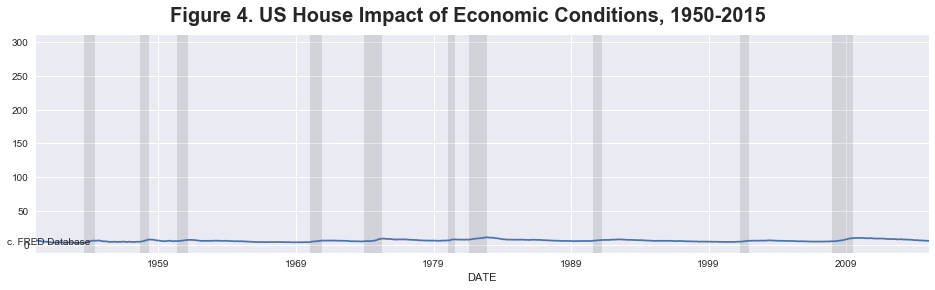

In [19]:
start, end = dt.datetime(1950, 2, 1), dt.datetime(2015, 1, 1)
data = web.DataReader(['UNRATE', 'USREC'],'fred', start, end)
data.columns = ['Unemployment Rate', 'Recession'] 
plt.figure(figsize=plt.figaspect(0.25))
data['Unemployment Rate'].plot()
plt.text(dt.datetime(1948, 1, 1), 1, 'c. FRED Database', fontsize=10, weight='regular')
plt.suptitle('Figure 4. US House Impact of Economic Conditions, 1950-2015', fontsize=20, weight='bold')
p3 = plt.scatter(housedem['Years'], housedem['Seats'], color = 'blue')
p4 = plt.scatter(housegop['Years'], housegop['Seats'], color = 'red')
hl_recession(recession_months())

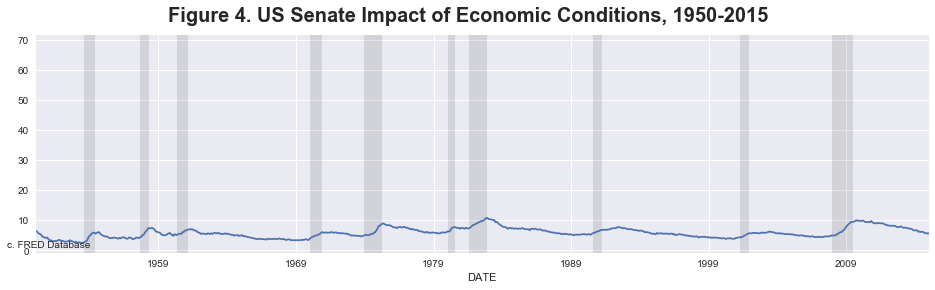

In [20]:
start, end = dt.datetime(1950, 2, 1), dt.datetime(2015, 1, 1)
data = web.DataReader(['UNRATE', 'USREC'],'fred', start, end)
data.columns = ['Unemployment Rate', 'Recession'] 
plt.figure(figsize=plt.figaspect(0.25))
data['Unemployment Rate'].plot()
plt.text(dt.datetime(1948, 1, 1), 1, 'c. FRED Database', fontsize=10, weight='regular')
plt.suptitle('Figure 4. US Senate Impact of Economic Conditions, 1950-2015', fontsize=20, weight='bold')
p3 = plt.scatter(senatedem['Years'], senatedem['Seats'], color = 'blue')
p4 = plt.scatter(senategop['Years'], senategop['Seats'], color = 'red')
hl_recession(recession_months())

### 7. Conclusion ###

It is difficult to draw from the data too many conclusions about the impact of economics. Indeed, the multitude of factors at play in any given moment, including social upheaval, challenges to cultural orders, and other factors, make it difficult to point to any one element and its impact on an election. However, there is certainly enough political variability occuring during times of economic difficulty to be able to ascribe some degree of causality between the two.